In [29]:
# libraries
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

# api
plotly.tools.set_credentials_file(username='acgarcia', api_key='asT7FaUCTFQ97M93vRLN')

# naming columns
cols = pd.read_csv('./stuff.csv')

# creating our dataframe
df_2017 = pd.read_csv('./personsx.csv', usecols = cols['Feature name in Doc'].str.strip())
df_2017 = df_2017.fillna(0)

In [4]:
# Subsetting and renaming
# dep stands for depression
dep_sex = df_2017.loc[:,['SEX','LACHRC17']]
dep_sex['SEX'] = dep_sex['SEX'].map({1:'male', 2:'female'})

In [5]:
# Cleaning our data into a desireable dataframe for both male and female
dep_male = pd.DataFrame(dep_sex[dep_sex['SEX'] == 'male']['LACHRC17'].value_counts())
dep_male = dep_male.reset_index()
dep_male = dep_male.loc[1:, :]
dep_male = dep_male.rename(index=str, columns={"index": "Code", "LACHRC17": "Male"})

dep_female = pd.DataFrame(dep_sex[dep_sex['SEX'] == 'female']['LACHRC17'].value_counts())
dep_female = dep_female.reset_index()
dep_female = dep_female.loc[1:, :]
dep_female = dep_female.rename(index=str, columns={"index": "Code", "LACHRC17": "Female"})

dep_sex = pd.concat([dep_male, dep_female], axis=1)
dep_sex = dep_sex.loc[:,~dep_sex.columns.duplicated()]
dep_sex['Code'] = dep_sex['Code'].map({1.0: 'Chronic', 2.0: 'Not chronic', 9.0:'Unknown if chronic'})

In [8]:
# Data for our bar plot
trace_male = go.Bar(
    x=dep_sex['Code'],
    y= dep_sex['Male'],
    name='Male'
)

trace_female = go.Bar(
    x=dep_sex['Code'],
    y= dep_sex['Female'],
    name='Female'
)

data = [trace_male, trace_female]
layout = go.Layout(
    barmode='stack',
    title = 'Depression/anxiety/emotional problem condition status among Males and Females'
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='condition_status_male_female.html')
py.iplot(fig, filename='stacked-bar')

Out of about 78k people, 921 females and 589 males are reported to have chronic depression. While for 9 females and 7 males, they did not know if it was chronic. 6 females and 2 males reported that it was not chronic. Lastly, the remaining people did not have an answer for this question.

In [11]:
# Subsetting the race column
races = df_2017.loc[:,['RACRECI3']]

# Subsetting by race
races_white = races[races == 1]
races_white = races_white.dropna()

races_black = races[races == 2]
races_black = races_black.dropna()

races_asian = races[races == 3]
races_asian = races_asian.dropna()

races_other = races[races == 4]
races_other = races_other.dropna()

# Traces per bar in histogram
trace_white = go.Histogram(
    x=races_white,
    name='White'
)
trace_black = go.Histogram(
    x=races_black,
    name='Black'
)
trace_asian = go.Histogram(
    x=races_asian,
    name='Asian'
)
trace_other = go.Histogram(
    x=races_other,
    name='Other'
)

# Plotting our histogram
data = [trace_white, trace_black, trace_asian, trace_other]
layout = go.Layout(barmode='stack', title = "Demographics of our data",
                    xaxis=dict(
                        ticks='',
                        showticklabels=False
                    )
                  )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='demographicsa.html')
py.iplot(fig, filename='stacked histogram')

Web Scraping Reddit

In [3]:
# Libraries
import praw
#v1167316@nwytg.net
#knz0l49j5bVGMA
#tmRkuDCl9AzIAs3UxDkTiCjEIXs

# initializing our API
reddit = praw.Reddit(client_id='knz0l49j5bVGMA',
                     client_secret='tmRkuDCl9AzIAs3UxDkTiCjEIXs',
                     user_agent='STA 160 Project')

In [6]:
# choosing our subreddit
subreddit = reddit.subreddit('depression')

Getting the first 100 titles from all time and controversial on /r/depression

In [56]:
all_time = []
controversial = []
# appends the titles of the first 100 posts to a list
for submission in subreddit.top(limit=100):
    all_time.append(submission.title)

for submission in subreddit.controversial(limit=100):
    controversial.append(submission.title)

In [57]:
# converting to lowercase
all_time = [k.lower() for k in all_time]
controversial = [k.lower() for k in controversial]

In [58]:
# nltk libraries
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# converting to dataframe so it is easier to tokenize
all_time_df = pd.DataFrame(all_time)
controversial_df = pd.DataFrame(controversial)

In [60]:
# Combining text into 1 string for tokenization
text_all_time = ' '.join(all_time_df[0])
text_controversial = ' '.join(controversial_df[0])

In [61]:
# Tokenizing each text to prep for a frequency distribution
tokenized_all_time = word_tokenize(text_all_time)
tokenized_controversial = word_tokenize(text_controversial)

In [68]:
# removing unnecessary words such as "I", "me", etc
stop_words = set(stopwords.words("english"))

banned_words = ['a', 'just', 'my', 'is', "n't", 'at', 'when', 'you', "'re", 'the', '.']

for i in banned_words:
    stop_words.add(i)

In [70]:
# filtered text w/o unnecessary words
filtered_all_time = []
filtered_controversial = []

In [71]:
# Filtering out noise to gauge the trending topics better
for w in tokenized_all_time:
    if w not in stop_words:
        filtered_all_time.append(w)

for w in tokenized_controversial:
    if w not in stop_words:
        filtered_controversial.append(w)

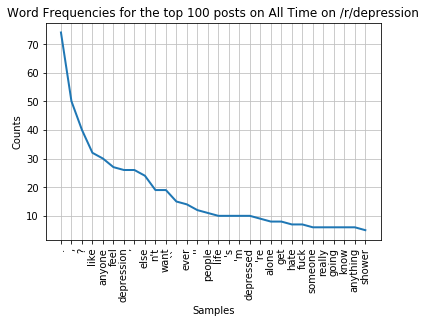

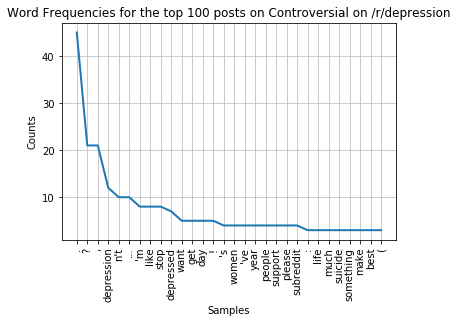

In [73]:
# Setting up a frequency distribution plot to get an idea of the most common words    
fdist_all_time = FreqDist(filtered_all_time)
fdist_all_time.most_common(2)
plt.title('Word Frequencies for the top 100 posts on All Time on /r/depression')
fdist_all_time.plot(30,cumulative=False)
plt.show()

fdist_controversial = FreqDist(filtered_controversial)
fdist_controversial.most_common(2)
plt.title('Word Frequencies for the top 100 posts on Controversial on /r/depression')
fdist_controversial.plot(30,cumulative=False)
plt.show()

Moving Forward
• Exploring other visualizations that can be used
• Making the visualizations more accurate by filtering out unnecessary words
• Analyze the top 500 all time and controversial posts to get a better idea of most frequently used words
• Add new categories such as guilded
• Explore other avenues that can be used in the Reddit API
• Maybe explore content of posts rather than titles
• Maybe explore comments of posts rather than titles
• possibly explore other subreddits
• TBA